[array([-2,  3]), array([-2.        ,  2.00000005]), array([-1.000005 ,  1.4855043]), array([-1.43674709,  1.09531997]), array([-0.86326729,  0.86888026]), array([-0.96759725,  0.67192814]), array([-0.77813526,  0.54331629]), array([-0.76881304,  0.43956631]), array([-0.69842156,  0.36618327]), array([-0.67641794,  0.3094411 ]), array([-0.64528995,  0.2679116 ]), array([-0.62903165,  0.2363846 ]), array([-0.613485  ,  0.21298686]), array([-0.60345764,  0.19536128]), array([-0.59517251,  0.18220675]), array([-0.58933683,  0.17232922]), array([-0.58478749,  0.16494055]), array([-0.58146435,  0.1593999 ]), array([-0.57893401,  0.15525152]), array([-0.57705785,  0.15214243]), array([-0.57564291,  0.14981373]), array([-0.57458734,  0.14806883]), array([-0.57379439,  0.1467617 ]), array([-0.57320134,  0.14578236]), array([-0.57275654,  0.14504869]), array([-0.57242355,  0.14449901]), array([-0.57217396,  0.14408721]), array([-0.57198702,  0.14377869]), array([-0.57184695,  0.14354755]), arra

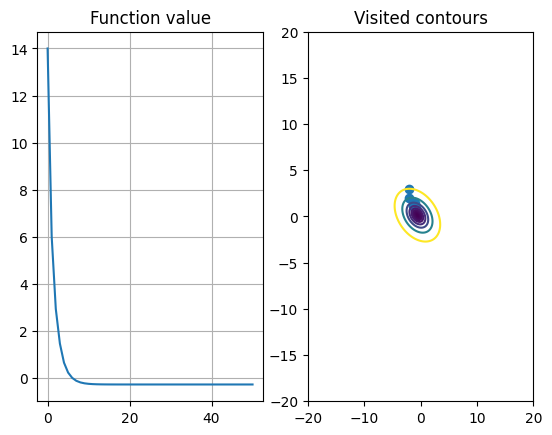

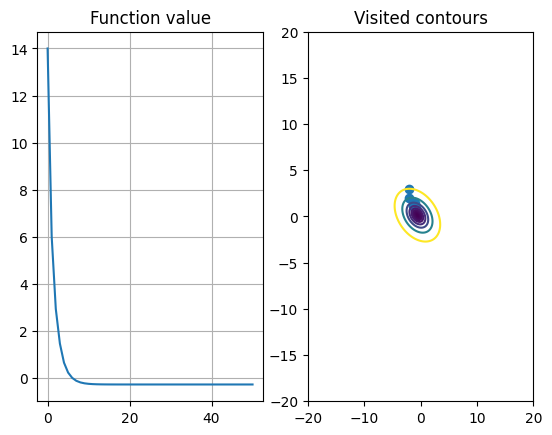

In [1]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi = SearchRegion2d((-20, 20), (-20, 20))


def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y

    return func


def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])

    return func


f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)


def sum_funcs(f, g):
    return lambda x: f(x) + g(x)


#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_with_momentum(0.5, True)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)
points = steepest_descent_adagrad(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_adagrad([f1, f2], [g1, g2], 1, np.array([-1, 1]), exponential_learning_scheduler(1, 0), lambda f, steps: len(steps) > 100)
print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

